topics: 

---

* frequency probability (YOEL)
* subjective probability (YOEL)
* random variables (RACHEL)
* continuous vs discrete R.V.s (RACHEL) 
* conditional probability (YOEL) 
* marginal probability (YOEL)
* joint probability (RACHEL)

---

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats

## Assigning numbers to groups of things

In very loose terms the framework of probability theory tells you how you should assign numbers, in a very specific ways, to groups of things.

This might be a bit slow but we'll try and build up in a reasonable amount of time. Imagine you have 3 groups, and inside these groups you have numbers between 1 and 10. Each group has some subset of the numbers between 1 and 10

In [ ]:
import numpy as np
from collections import Counter

groupA = np.array([1, 1, 1, 3, 3, 4, 5, 6, 7, 7, 7, 8, 9, 10])
print("groupA = : ", groupA)

groupB = np.arange(2, 10, 2)
print("groupB = : ", groupB)

groupC = np.setdiff1d(groupA, groupB)
print("groupC = : ", groupC)

groupA = :  [ 1  1  1  3  3  4  5  6  7  7  7  8  9 10]
groupB = :  [2 4 6 8]
groupC = :  [ 1  3  5  7  9 10]


If you read books on probability theory the above might have the following names attached to them: 

groupA: **sample space**

groupB: **event, a subset of the sample space**

3: **outcome of the event groupC**

it's not too important that you memorize these definitions but we just want to make you aware of them. Now that we have "groups of things" we want to use the rules of probability theory to consistently assign numbers to "things happening". Usually when someone asks about a probability of an event it roughly falls into an interpertation in terms of: 

## frequency of event happening

imagine you sample a number randomly from groupA, and you tally up the times that the number(s) comes up then divide by the total amount of times sampled. If we didn't know all of the possible outcomes of groupA then we could define the probability of those numbers as so: 

In [ ]:
nSamples = 500000
samples = np.random.choice(groupA, nSamples)
sampleDist = [(key, val / nSamples) for key, val in sorted(Counter(samples).items())]
print("key, probability:")
sampleDist

key, probability:


[(1, 0.214932),
 (3, 0.14412),
 (4, 0.071102),
 (5, 0.071496),
 (6, 0.071382),
 (7, 0.213216),
 (8, 0.07143),
 (9, 0.071248),
 (10, 0.071074)]

it happens to be the case that because we do know the entire sample space we can analyically compute the probability of each number, which we do below _(we can almost never do this "in the real world" with real data)_

In [ ]:
trueN = len(groupA)
print("key, probability:")
trueDist = [(key, val / trueN) for key, val in sorted(Counter(groupA).items())]
trueDist

key, probability:


[(1, 0.21428571428571427),
 (3, 0.14285714285714285),
 (4, 0.07142857142857142),
 (5, 0.07142857142857142),
 (6, 0.07142857142857142),
 (7, 0.21428571428571427),
 (8, 0.07142857142857142),
 (9, 0.07142857142857142),
 (10, 0.07142857142857142)]

### Q.1 
The above is also referred to a relatively naive interpretation of probability (to be clear, the view point of frequency of events is not by itself what makes this naive). 

**Write down a reason why probability as defined above is naive. Or rather, under what condition is the above definition of probability invalid, in the sense that it would not reflect reality?**

## Degree of belief

We could alternatively imagine a case where an event only happens once, as in a presidential election. In this case we might say that we are reasonaly sure our favorite candidate will win, and assign a number to that degree of belief. This is called a subjective probability. 

In any case both definitions of probability rely on the concept of **random variables**.


## Formal definition: 

A _probability space_ contains two elements, a sample space $G$ and a probability function $P(\cdot)$ which takes an event $A$ (that is a subset of $G$) as input and returns a real number between 0 and 1: $P(A)$

There are particular properties that together a sample space and probability function must meet, these properties further rely on 2 basic claims: 

1. $P(nothing) = 0$ and $P(G) = 1$

if $A_1, ...,$ are disjoint events then:

2. $P(\bigcup_{A_i \in G} A_i) = \sum _{A_i \in G} P(A_i)$

in words, the above states that disjoint events are mutually exclusive: e.g. $P(A_i , A_j) = 0$ if $i \neq j$

## 

# Random Variables

A random variable is just like a normal variable we use in algebra, except it's value depends on the outcome of a random phenomenon. Random variables are an important part of Probability Theory. 

For example, we can consider random variable $X$ that denotes the outcome of a coin flip. If the coin flips to heads, $X = 0$, to tails, $X = 1$. We can consider different properties of random variable X such as how likely $X = 0$ or $X = 1$. We use the random variable because we don't quite know the possible outcome, and we want to be able to measure the probabilities for each outcome (altogether forming a probaiblity distribution). 



## Discrete Random Variables

The coin flip described earlier is an example of a *discrete* random variable because the possible values for X is finite or countably infinite. 

We can consider functions on discrete variables such as the **probability mass function** of a random variable which describes how likely a random variable $X$ can take on some value $x$. We can formally define this for disecrete random variables as $p(x) = P(X = x)$ such that $x$ denotes each possible value that $X$ can take. 

In the coin flip case, we can say that the set of possible values for $X$ is $X = {0, 1}$, a finite set. If the coin is fair, then we can say that $p(0) = p(X = 0) = 0.5$ and $p(1) = p(X = 1) = 0.5$. 

You can see that it will always be true that $\sum_{x \in X} p(x) = 1$ or that the sum of the probability of X being all its possible values will be 1. 


We can also consider the **cumulative distribution function (cdf)** of a random variable which describes how likely a random variable $X$ can be less than or equal to some value $x$. This is formally defined as $F(x) = P(X <= x)$ and specifically for discrete variables as $F(x) = \sum_{t\in X: t x} p(t)$. 

Examples of discrete random variables include Bernoulli (eg. the coin flip, probability $p$ for one outcome, $1-p$ for the other outcome), Binomial (a series of Bernoulli's), Poisson, discrete uniform variables. 

In this example, we can see that P(x = 2) = 0.35
You can also see how the sum of P(x = x_i) for all x_i is 1


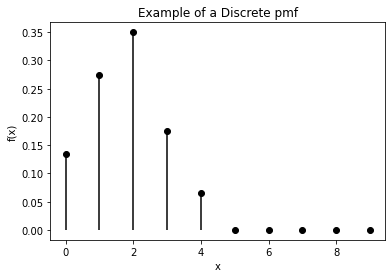

In [ ]:
# example of pmf for discrete random variables
pmf = np.array([2.7, 5.5, 7, 3.5, 1.3, 0, 0, 0, 0, 0])/20
plt.vlines(np.arange(10), np.zeros((10)), pmf)
plt.plot(np.arange(10), pmf, 'ko')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Example of a Discrete pmf')
print("In this example, we can see that P(x = 2) = 0.35")
print("You can also see how the sum of P(x = x_i) for all x_i is 1")



**EXAMPLE 1** A fair coin is flipped three times. Let $X$ be the total number of heads. 
1. What are the possible values for $X$? Is $X$ a discrete variable?  
2. What is the pmf for those possible values? 




*solution:*
The set of possible values of X is X = {0,1,2,3}, a finite set, so X is discrete. Its pmf is p(0) = p(3) = 1/8, p(1) = p(2) = 3/8. We can also recognize X as a binomial random variable.



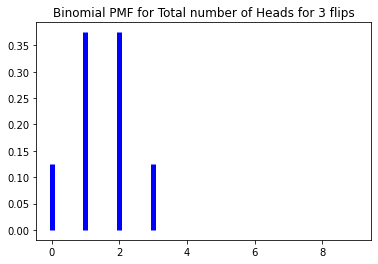

In [ ]:
x = np.arange(10)
n = 3
p = 0.5
rv = stats.binom(n, p)
plt.vlines(x, 0, rv.pmf(x), colors='b', linestyles='-', lw=5)
plt.title("Binomial PMF for Total number of Heads for 3 flips")
plt.show()


**EXAMPLE 2**: A fair coin is flipped repeatedly until it comes up heads. Let $X$ be the total number of flips needed to obtain heads. Again, 
1. What are the possible values for $X$? Is $X$ a discrete variable?  
2. What is the pmf for those possible values? 




*solution:* 
The set of possible values of $X$ is $X = {1, 2, 3, . . .}$, a countably infinite set, so X is discrete. 
Its pmf is $p(x) = 2^{-x}$ for every $x \in {1, 2, 3, . . .}$. We can also recognize X as a geometric random variable.



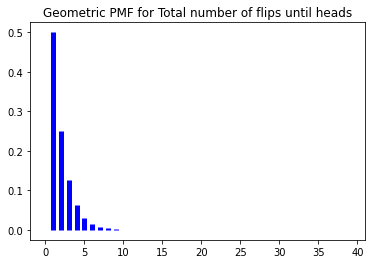

In [ ]:
x = np.arange(40)
p = 0.5 
rv = stats.geom(p)
plt.vlines(x, 0, rv.pmf(x), colors='b', linestyles='-', lw=5)
plt.title("Geometric PMF for Total number of flips until heads")
plt.show()

# Continuous Random Variables

A random variable $X$ is continuous if its possible values form an uncountable set (eg. some interval on $\Re$ ); in other words, it takes values in a continuous space. 

Note that the probability for X equal to any specific value is *exactly* 0. So instead of a pmf, we look at the probability density function (pdf), which will be defined formally as $\int_a^b f(x) dx = P(a \le X \le b)$ for any $a, b \in \Re$. Just like with the pmf, we know that $\int_{- \infty}^\infty f(x) dx = 1$ is always true.

We can also define the cdf of a random variable $X$ as $F(x) = P(X\le x)$, so for continuous rv $X$, we can define it as $F(x) = P(X \le x) = \int_{- \infty}^x f(x) dx$. 

The pdf is obtained by differentiating the cdf. Examples of continuous random variables include normal, exponential, beta, gamma, chi-squared, Student's t, and continuous uniform random variable. 

Text(0.5, 1.0, 'Example continuous random variable PDF (normal distribution)')

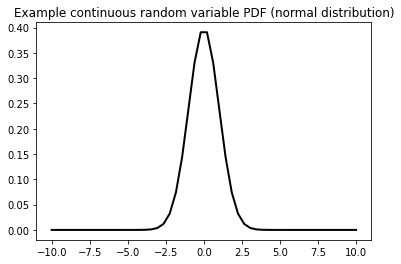

In [ ]:
x = np.linspace(-10, 10)
rv = stats.norm()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.title('Example continuous random variable PDF (normal distribution)')

**EXAMPLE 1:**  
Let $X$ be the amount of time in hours that an electrical component functions before breaking down. This random variable might have the pdf: 

$f(x) =  \bigg\{ \begin {array}{l} \lambda \exp(- \lambda x) \text{ if } x \ge 0, \\
    0 \text { if } x < 0.
  \end{array}$

This is the expontential distribution. We can plot this pdf as below. 

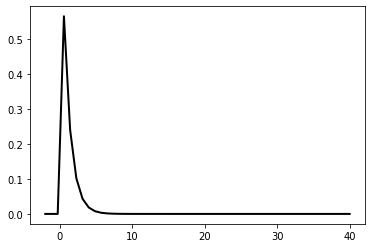

In [ ]:
x = np.linspace(-2, 40)
rv = stats.expon()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

Can you calculate the probability that the part function will last at least $c$ hours? 

*solution:* $P(X \le c) = \int_c^\inf f(x) dx = \exp(-c \lambda) $

# Joint, Conditional, Marginal Probability 

## Discrete Random Variables

Let $X$ and $Y$ be discrete random variables that take on values $x$ and $y$ respectively. 

We can then consider the **joint pmf** of $X$ and $Y$ as $p(x, y) = P(X = x, Y = y)$. In other words, this is the probability of X *and* Y taking on those values. 

For a discrete random variables, we can look at joint probabilities like a table. 

Here we have $P(x, y)$ with the rows taking the x values, and columns y values 

|| | | | | 
|-|-|-|-|-| 
||**x=-2**|**x=-1**|**x=0**|**x=1**|
|**y=4**|.01 |.03 |.07 |.08 | 
|**y=5**|.03 |.07 |.14 |.07 | 
|**y=6**|.07 |.14 |.07 |.03 | 
|**y=7**|.08 |.07 |.03 |.01 |

So we can consider, say, $P(-2, 5) = 0.03$ by this lookup table. 

We can consider the **marginal pmfs** of a joint pmf, which is the probability of only one variable, regardless of the other variables' values. Concretely, this means, given joint pmf $p(x, y)$, the marginal pmf of X is $P(X = x)$ regardless of what value $Y$ takes and the marginal pmf of Y is $P(Y = y)$ regardless of what value $X$ takes. 

Mathematically, we can define this as

$P(X = x) = \sum_{y \in \mathcal{Y}} P(X = x, Y = y)$ 

$P(Y = y) = \sum_{x \in \mathcal{X}} P(X = x, Y = y)$ 

Intuitively, we can look at our table and essentially *sum* down a row or column. 

For example, given our discrete probabilities above, if we're looking for $P(X = x)$, we will sum all the rows. 

P(X = x) =  [0.19 0.31 0.31 0.19]


<BarContainer object of 4 artists>

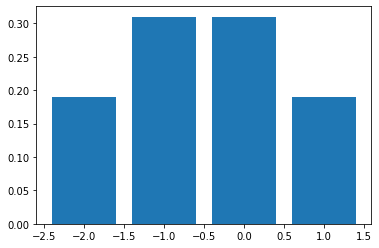

In [ ]:
P_xy = np.array([[.01, .03, .07, .08], [.03, .07, .14, .07], [.07, .14, .07, .03], [.08, .07, .03, .01]])
P_x = np.sum(P_xy, axis = 0)
print("P(X = x) = ", P_x)

plt.bar([-2, -1, 0, 1], P_x)

Note that like all pmfs, we can see that $\sum_{x \in X} p(x) = 1$


Another important pmf we can derive from joint pmfs are **Conditional PMFs.** Unlike marginal pmfs, which is the pmf for $X = x$ irrespective of the value of $Y$, conditional pmfs is the pmf for $X = x$ *given* that $Y$ is a specific value $y$. 

Mathematically, that is defined as: 

$P(X = x | Y = y) = \frac {P(X = x, Y = y)}{P(Y = y)}$

$P(Y = y | X = x) = \frac {P(X = x, Y = y)}{P(X = x)}$


Intuitively, we can calculate the conditional pmf by looking at the specific row/column for the variable we want to condition on. 

For example, if we want $P(y|x = -1)$, we will look at the second column for $x = -1$. 


|| | | | | 
|-|-|-|-|-| 
||**x=-2**|**x=-1**|**x=0**|**x=1**|
|**y=4**|.01 |**.03** |.07 |.08 | 
|**y=5**|.03 |**.07**  |.14 |.07 | 
|**y=6**|.07 |**.14** |.07 |.03 | 
|**y=7**|.08 |**.07** |.03 |.01 |

But note that the column doesn't sum to 1-- we need to scale the column's values by the marginal pmf $P(x = -1)$. This is the intuition behind the mathematical definition of the conditional pmf, i.e. 

$P(Y = y|x = -1) = \frac{P(y, x = -1)}{P(x = -1)}$

From our earlier example, we know $P(x = -1) = 0.31$, so we just need to take our column and scale it by the marginal probability.  

In [ ]:
P_y_given_x = P_xy[:,1] / 0.31
print("P(Y = y | x = -1) = ", P_y_given_x)

P(Y = y | x = -1) =  [0.09677419 0.22580645 0.4516129  0.22580645]


## Continuous Random Variables

We can also look at joint, marginal, and conditional distributions for continuous random variables. 

Given continuous random variables $X$, $Y$, the joint pdf of $X$ and $Y$ is the nonnegative function s.t. 

$f(x_y) = \iint A f^{(X, Y)} (x, y) \,dx \,dy = P[(X, Y) \in A] \text{ for any set }A \subset \Re^2$


Like our table example earlier, let us consider an example joint pdf as we go through the marginal and conditional distributions. We will use the Gaussian distribution.

Text(0.5, 1.0, 'P(x,y)')

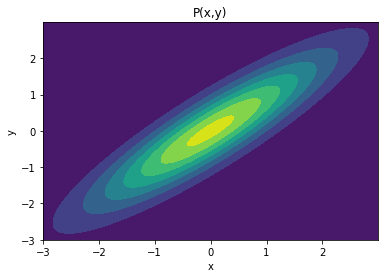

In [ ]:
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
rv = stats.multivariate_normal(mean=[0,0], cov=[[2, 1.8], [1.8, 2]])
plt.contourf(x, y, rv.pdf(pos))
plt.xlabel('x')
plt.ylabel('y')
plt.title('P(x,y)')

As with before, the marginal distribution $P(X)$ of $P(x,y)$ would be the probability for $X$ given any values for $Y$. 

Mathematically, we can define this as: 

$f(x) = \int_{- \infty}^\infty f(x, y) dy$ 

$f(y) = \int_{- \infty}^\infty f(x, y) dx$

Intuitively, we will again "sum" across rows for $f(x)$ and across columns for $f(y)$. 